<h3>前回の復習</h3>

In [25]:
import numpy as np
import pandas as pd
#キリンホールディングスの自社株買い前後の累積異常リターン（CAR）を求める
df = pd.read_csv("stock_data/2503_2019.csv", encoding="shift-jis") 
#キリンの自社株買いの実行日
df[df["日付"] == "2019/11/8"] 
#自社株買い実行日をt＝０としたときの他の日のt
df["t"]= [i for i in range(-204, 37)]
df[df["日付"] == "2019/11/8"] 
df["r_i"] = (df["終値調整値"] - df["終値調整値"].shift(1))/ df["終値調整値"].shift(1)
#1306 東証ETF TOPIX連動型上場投資信託（ETF）
etf = pd.read_csv("stock_data/1306_2019.csv", encoding="shift-jis") 
etf["r_m"] = (etf["終値調整値"] - etf["終値調整値"].shift(1))/ etf["終値調整値"].shift(1)
df["r_m"] = etf["r_m"]
#推定期間スタート
df[df["t"] == -200]
#推定期間エンド
df[df["t"] == -21]
kirin = df[["r_i"]][4:183]
market = df[["r_m"]][4:183]
from sklearn import linear_model # 線形モデル関係
import statsmodels.api as smf # 統計量計算
Y = kirin["r_i"]
X = market["r_m"]
#単回帰分析モデルの作成
model = smf.OLS(Y,X) 
result = model.fit()
result.summary()
from sklearn import linear_model
clf = linear_model.LinearRegression()
Y = kirin[["r_i"]]
X = market[["r_m"]]
clf.fit(X,Y)
df[df["t"] == -20]
df["expect"] = list(map(lambda x: clf.intercept_[0] + clf.coef_[0][0] * x, df["r_m"].values))
df

,日付,始値,高値,安値,終値,出来高,終値調整値,t,r_i,r_m,expect
0,2019/1/4,2253.5,2309.0,2250.5,2309.0,2627500,2309.0,-204,NaN,NaN,NaN
1,2019/1/7,2394.5,2407.0,2348.5,2373.0,2256600,2373.0,-203,0.027718,0.028308,0.022168
2,2019/1/8,2390.5,2396.0,2345.5,2345.5,2532300,2345.5,-202,-0.011589,0.004481,0.003198
3,2019/1/9,2378.5,2418.5,2372.5,2407.5,2717200,2407.5,-201,0.026434,0.009560,0.007242
4,2019/1/10,2360.0,2370.0,2328.0,2369.5,2018700,2369.5,-200,-0.015784,-0.006313,-0.005396
...,...,...,...,...,...,...,...,...,...,...,...
236,2019/12/24,2484.0,2485.0,2445.0,2451.0,1521600,2451.0,32,-0.012291,0.000000,-0.000370
237,2019/12/25,2454.5,2463.0,2427.0,2433.5,1151200,2433.5,33,-0.007140,-0.003913,-0.003485
238,2019/12/26,2434.0,2458.0,2433.0,2458.0,1535700,2458.0,34,0.010068,0.005612,0.004098
239,2019/12/27,2424.0,2424.5,2397.0,2403.0,1518900,2403.0,35,-0.022376,0.004464,0.003184


<h3>異常リターンを計算する</h3>

In [26]:
df["ar"] = df["r_i"].values - df["expect"].values
df

,日付,始値,高値,安値,終値,出来高,終値調整値,t,r_i,r_m,expect,ar
0,2019/1/4,2253.5,2309.0,2250.5,2309.0,2627500,2309.0,-204,NaN,NaN,NaN,NaN
1,2019/1/7,2394.5,2407.0,2348.5,2373.0,2256600,2373.0,-203,0.027718,0.028308,0.022168,0.005549
2,2019/1/8,2390.5,2396.0,2345.5,2345.5,2532300,2345.5,-202,-0.011589,0.004481,0.003198,-0.014787
3,2019/1/9,2378.5,2418.5,2372.5,2407.5,2717200,2407.5,-201,0.026434,0.009560,0.007242,0.019192
4,2019/1/10,2360.0,2370.0,2328.0,2369.5,2018700,2369.5,-200,-0.015784,-0.006313,-0.005396,-0.010388
...,...,...,...,...,...,...,...,...,...,...,...,...
236,2019/12/24,2484.0,2485.0,2445.0,2451.0,1521600,2451.0,32,-0.012291,0.000000,-0.000370,-0.011921
237,2019/12/25,2454.5,2463.0,2427.0,2433.5,1151200,2433.5,33,-0.007140,-0.003913,-0.003485,-0.003655
238,2019/12/26,2434.0,2458.0,2433.0,2458.0,1535700,2458.0,34,0.010068,0.005612,0.004098,0.005970
239,2019/12/27,2424.0,2424.5,2397.0,2403.0,1518900,2403.0,35,-0.022376,0.004464,0.003184,-0.025560


<h3>累積異常リターンを計算する</h3>

In [27]:
df[df["t"] == 0]

,日付,始値,高値,安値,終値,出来高,終値調整値,t,r_i,r_m,expect,ar
204,2019/11/8,2498.0,2585.0,2436.0,2518.5,8073400,2518.5,0,0.095476,0.002843,0.001893,0.093583


In [28]:
ar = round(df[df["t"] == 0]["ar"].values[0] * 100, 1)
print(f"{ar}%")

9.4%


In [29]:
car =( df[df["t"] == -1]["ar"].values[0]
      +df[df["t"] == 0]["ar"].values[0]
      +df[df["t"] == 1]["ar"].values[0]
     )
print(f"{round(car * 100, 1)}%")

10.8%


<h3>累積異常リターンを描画する</h3>

In [30]:
car_li = []

value = 0
for i in  df["ar"].values[1:] :
    value += i
    car_li.append(value)

car_li

[0.005549411541218352,
 -0.00923744456526946,
 0.009954419308071429,
 -0.0004334339137101427,
 0.016442041447671838,
 0.015113068513290421,
 0.023425013257656748,
 0.029711231328239683,
 0.03781730370820944,
 0.03875444130752102,
 0.051253757559579935,
 0.05025007392508431,
 0.05697481876443445,
 0.06289408494477612,
 0.06721783480597224,
 0.08033498998351515,
 0.06964339044894746,
 0.07081966557560275,
 0.08561440701825275,
 0.09771883628693437,
 0.09199393953136309,
 0.11510813221747505,
 0.0952782260223237,
 0.07706214099637355,
 0.10763301552811427,
 0.08997360688188534,
 0.09712309968269082,
 0.044980420860303856,
 0.057208754085986926,
 0.04771040221201968,
 0.056038603244178906,
 0.03862034531419146,
 0.022987216252667392,
 0.025952635362882216,
 0.03664522101188304,
 0.03128166366627158,
 0.022874861736344766,
 0.016321815176573447,
 0.013189599965628875,
 0.015334311227364204,
 0.013650643866709626,
 0.01800767127244516,
 0.05507344625740112,
 0.07089542602402103,
 0.053850114

In [31]:
df[df["t"] == -20]

,日付,始値,高値,安値,終値,出来高,終値調整値,t,r_i,r_m,expect,ar
184,2019/10/8,2286.5,2295.5,2251.0,2258.0,2013600,2258.0,-20,-0.010734,0.01107,0.008444,-0.019178


In [32]:
df[df["t"] == 20]

,日付,始値,高値,安値,終値,出来高,終値調整値,t,r_i,r_m,expect,ar
224,2019/12/6,2449.5,2460.5,2445.5,2455.0,1988400,2455.0,20,0.009872,0.0,-0.00037,0.010242


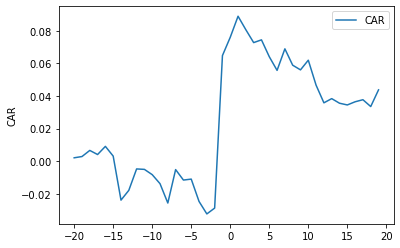

In [33]:
#検証期間中の累積異常リターンを描画
import matplotlib.pyplot as plt

plt.plot(df["t"].values[184:224], car_li[184:224], label="CAR")

# 凡例の表示
plt.legend()

#装飾

plt.ylabel('CAR')

# プロット表示(設定の反映)
plt.show()